QUESTION 1.45

#### Importing libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Load the data

In [76]:
import pandas as pd

data = pd.read_excel("C:\\Users\\kwame\\OneDrive\\Desktop\\1.45.xlsx", header=None)

      0      1     2    3     4      5    6   7   8    9    10    11
0      1   7.13  55.7  4.1   9.0   39.6  279   2   4  207  241  60.0
1      2   8.82  58.2  1.6   3.8   51.7   80   2   2   51   52  40.0
2      3   8.34  56.9  2.7   8.1   74.0  107   2   3   82   54  20.0
3      4   8.95  53.7  5.6  18.9  122.8  147   2   4   53  148  40.0
4      5  11.20  56.5  5.7  34.5   88.9  180   2   1  134  151  40.0
..   ...    ...   ...  ...   ...    ...  ...  ..  ..  ...  ...   ...
108  109  11.80  53.8  5.7   9.1  116.9  571   1   2  441  469  62.9
109  110   9.50  49.3  5.8  42.0   70.9   98   2   3   68   46  22.9
110  111   7.70  56.9  4.4  12.2   67.9  129   2   4   85  136  62.9
111  112  17.94  56.2  5.9  26.4   91.8  835   1   1  791  407  62.9
112  113   9.41  59.5  3.1  20.6   91.7   29   2   3   20   22  22.9

[113 rows x 12 columns]


In [77]:
file_path = (r'C:\Users\kwame\OneDrive\Desktop\abbb.txt')
df = pd.read_csv(file_path, delimiter='\t')
df.to_csv('seadasfile1.csv', index=False) 

In [78]:
data = pd.read_excel("C:\\Users\\kwame\\OneDrive\\Desktop\\1.45.xlsx", header=None)
data.columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12"]

# Rename columns for clarity
data["LOS"] = data["V2"]
data["InfRisk"] = data["V4"]
data["FacServ"] = data["V12"]
data["XRay"] = data["V6"]

      V1     V2    V3   V4    V5     V6   V7  V8  V9  V10  V11   V12    LOS  \
0      1   7.13  55.7  4.1   9.0   39.6  279   2   4  207  241  60.0   7.13   
1      2   8.82  58.2  1.6   3.8   51.7   80   2   2   51   52  40.0   8.82   
2      3   8.34  56.9  2.7   8.1   74.0  107   2   3   82   54  20.0   8.34   
3      4   8.95  53.7  5.6  18.9  122.8  147   2   4   53  148  40.0   8.95   
4      5  11.20  56.5  5.7  34.5   88.9  180   2   1  134  151  40.0  11.20   
..   ...    ...   ...  ...   ...    ...  ...  ..  ..  ...  ...   ...    ...   
108  109  11.80  53.8  5.7   9.1  116.9  571   1   2  441  469  62.9  11.80   
109  110   9.50  49.3  5.8  42.0   70.9   98   2   3   68   46  22.9   9.50   
110  111   7.70  56.9  4.4  12.2   67.9  129   2   4   85  136  62.9   7.70   
111  112  17.94  56.2  5.9  26.4   91.8  835   1   1  791  407  62.9  17.94   
112  113   9.41  59.5  3.1  20.6   91.7   29   2   3   20   22  22.9   9.41   

     InfRisk  FacServ   XRay  
0        4.1     60.

#### a. Fit three first-order models and state the estimated regression functions

In [79]:
X1 = data["InfRisk"]
X2 = data["FacServ"]
X3 = data["XRay"]
y = data["LOS"]

# Model 1: LOS ~ InfRisk
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()
b0_1, b1_1 = model1.params["const"], model1.params["InfRisk"]
print("Model 1: LOS = {:.3f} + {:.3f} * InfRisk".format(b0_1, b1_1))

# Model 2: LOS ~ FacServ
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
b0_2, b1_2 = model2.params["const"], model2.params["FacServ"]
print("Model 2: LOS = {:.3f} + {:.3f} * FacServ".format(b0_2, b1_2))

# Model 3: LOS ~ XRay
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()
b0_3, b1_3 = model3.params["const"], model3.params["XRay"]
print("Model 3: LOS = {:.3f} + {:.3f} * XRay".format(b0_3, b1_3))

Model 1: LOS = 6.337 + 0.760 * InfRisk
Model 2: LOS = 7.719 + 0.045 * FacServ
Model 3: LOS = 6.566 + 0.038 * XRay


#### b. Plot the three estimated regression functions and data on separate graphs


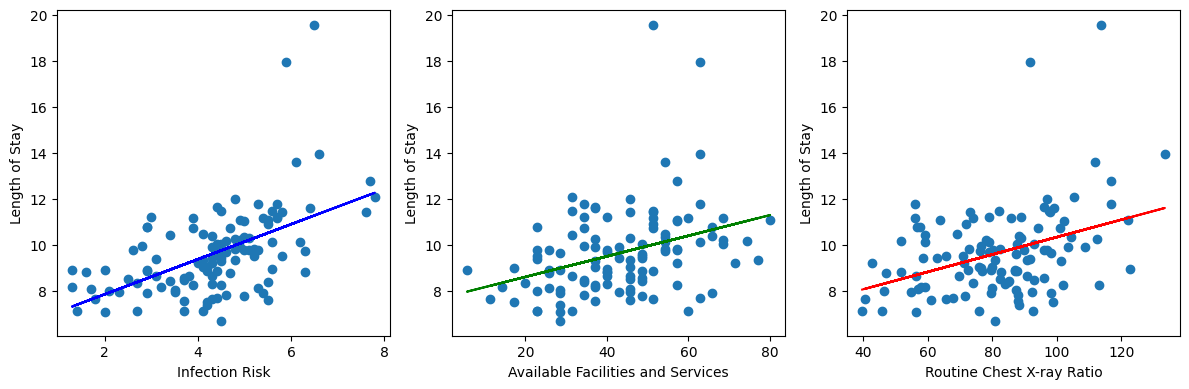

In [80]:
plt.figure(figsize=(12, 4))

# Model 1: LOS ~ InfRisk
plt.subplot(131)
plt.scatter(data["InfRisk"], data["LOS"])
plt.plot(data["InfRisk"], model1.predict(X1), color="blue")
plt.xlabel("Infection Risk")
plt.ylabel("Length of Stay")

# Model 2: LOS ~ FacServ
plt.subplot(132)
plt.scatter(data["FacServ"], data["LOS"])
plt.plot(data["FacServ"], model2.predict(X2), color="green")
plt.xlabel("Available Facilities and Services")
plt.ylabel("Length of Stay")

# Model 3: LOS ~ XRay
plt.subplot(133)
plt.scatter(data["XRay"], data["LOS"])
plt.plot(data["XRay"], model3.predict(X3), color="red")
plt.xlabel("Routine Chest X-ray Ratio")
plt.ylabel("Length of Stay")

plt.tight_layout()
plt.show()

#### c. Calculate MSE for each X

In [81]:
MSE1 = model1.mse_resid
MSE2 = model2.mse_resid
MSE3 = model3.mse_resid
print("MSE for Model 1:", MSE1)
print("MSE for Model 2:", MSE2)
print("MSE for Model 3:", MSE3)

MSE for Model 1: 2.637518242906334
MSE for Model 2: 3.2205696926312624
MSE for Model 3: 3.147261269762166
